In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Engg_College_Data.csv')

In [4]:
df.sample(6)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
8,9,I,4,4,4,4,4
14,15,O,3,2,2,2,3
24,25,Y,1,1,1,1,5
9,10,J,3,4,3,4,5
17,18,R,3,4,4,3,3
19,20,T,3,5,3,2,3


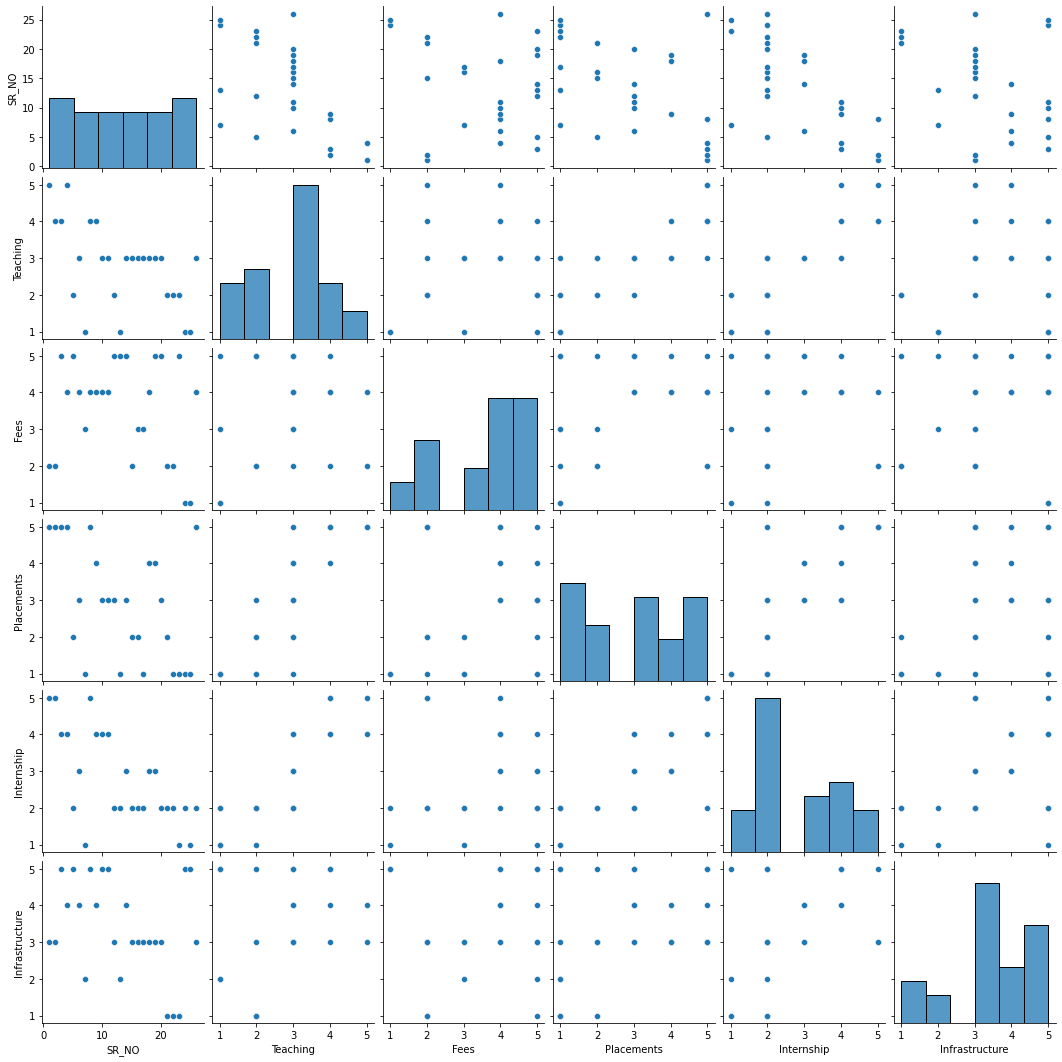

In [5]:
sns.pairplot(df)

<AxesSubplot:>

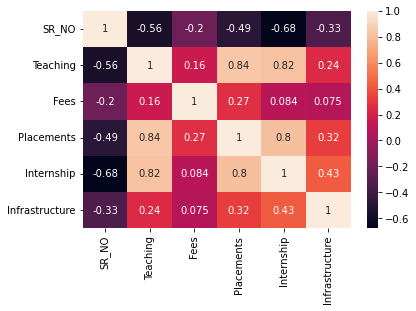

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
data=df.drop(['SR_NO'],axis=1)

In [8]:
data.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
link_method = linkage(data.iloc[:,1:6], method = 'average')

In [12]:
labelList = np.array(data.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

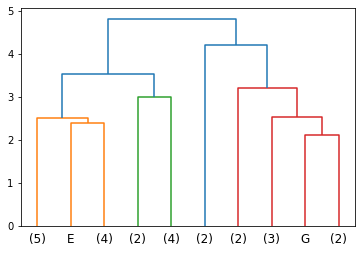

In [13]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )

In [18]:
from scipy.cluster.hierarchy import fcluster

In [19]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [20]:
df['clusters']=clusters

In [23]:
df.clusters.value_counts().sort_index()

1    16
2     2
3     8
Name: clusters, dtype: int64

In [24]:
agg_data=df.groupby(['clusters']).mean()

In [25]:
agg_data

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
clusters,,,,,,
1,10.50,3.375,4.125,3.875,3.4375,3.875
2,24.50,1.000,1.000,1.000,1.5000,5.000
3,16.75,2.125,3.125,1.375,1.7500,2.000


In [26]:
agg_data['freq']=df.clusters.value_counts().sort_index()

In [27]:
agg_data

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure,freq
clusters,,,,,,,
1,10.50,3.375,4.125,3.875,3.4375,3.875,16
2,24.50,1.000,1.000,1.000,1.5000,5.000,2
3,16.75,2.125,3.125,1.375,1.7500,2.000,8
